# Imports

In [ ]:
from notebooks import *

INFO     [17:47:53.804] [40191] 151 logging_/<module>: {logging_yaml: None}

In [ ]:
# Import bqq() / %%bqq
#   - HACK Add pydatalab
#       - Use local fork to avoid having to deal with upgrades and porting old patches
sys.path.insert(1, os.path.expanduser('~/hack/pydatalab'))
from potoo.bqq import *
%load_ext potoo.sql_magic

The potoo.sql_magic extension is already loaded. To reload it, use:

  %reload_ext

potoo.sql_magic

In [ ]:
def var_checkpoint(var_name, env, pkl_path='/tmp/var_checkpoint/%s.pkl'):
    pkl_path = pkl_path % var_name
    if var_name in env:
        print('dump: %(var_name)s -> %(pkl_path)s' % locals())
        joblib.dump(env[var_name], ensure_parent_dir(pkl_path))
    else:
        print('load: %(var_name)s <- %(pkl_path)s' % locals())
        env[var_name] = joblib.load(pkl_path)

def sort_like(xs, ys):
    ys = list(ys)
    return sorted(xs, key=lambda x: ys.index(x) if x in ys else -1)

def sort_like_com_name(xs):
    return sort_like(xs, metadata.species.df.com_name.dtype.categories)

# XXX Scratch queries

In [ ]:
bqq('''
    select *
    from ebird.obs_sample_001
    where state_code = 'US-AZ'
    limit 20
''')

Running query...

[2s] cost[cached] rows[20] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_UTZVSCJGQGmhLMEWavgyr6k9GAPD&page=queryresults]

Fetching results...

[0s]

,global_unique_identifier,last_edited_date,taxonomic_order,category,common_name,scientific_name,subspecies_common_name,subspecies_scientific_name,observation_count,breeding_bird_atlas_code,breeding_bird_atlas_category,age_sex,country,country_code,state,state_code,county,county_code,iba_code,bcr_code,usfws_code,atlas_block,locality,locality_id,_locality_type,latitude,longitude,observation_date,time_observations_started,observer_id,sampling_event_identifier,protocol_type,protocol_code,project_code,duration_minutes,effort_distance_km,effort_area_ha,number_observers,all_species_reported,group_identifier,has_media,approved,reviewed,reason,trip_comments,species_comments
0,URN:CornellLabOfOrnithology:EBIRD:OBS154844026,2015-03-11 18:14:56,17800.0,species,Warbling Vireo,Vireo gilvus,None,None,4,None,None,None,United States,US,Arizona,US-AZ,Cochise,US-AZ-003,US-AZ_901,34,None,None,San Pedro RNCA--San Pedro House and trails,L129080,H,31.5,-110.0,2012-05-12,10:20:00,obsr27006,S10875029,Traveling,P22,EBIRD,140,2.100,None,4,1,G420000,0,1,0,None,"With DVP, Tim Schreck, and Carl Lundblad. Ran into others on the trail as well, who pointed us to the continuing NOWA but we missed the reported RBGR. Walked the river tr...",None
1,URN:CornellLabOfOrnithology:EBIRD:OBS168756555,2015-03-11 18:14:56,30300.0,species,Western Meadowlark,Sturnella neglecta,None,None,17,None,None,None,United States,US,Arizona,US-AZ,Cochise,US-AZ-003,US-AZ_901,34,None,None,San Pedro RNCA--San Pedro House and trails,L129080,H,31.5,-110.0,2012-11-06,08:00:00,obsr170034,S11977575,Traveling,P22,EBIRD,150,4.020,None,1,1,None,0,1,0,None,None,None
2,URN:CornellLabOfOrnithology:EBIRD:OBS269503514,2015-03-11 18:14:56,21300.0,species,Cactus Wren,Campylorhynchus brunneicapillus,None,None,1,None,None,None,United States,US,Arizona,US-AZ,Cochise,US-AZ-003,US-AZ_901,34,None,None,San Pedro RNCA--San Pedro House and trails,L129080,H,31.5,-110.0,2012-05-18,08:00:00,obsr397599,S19604846,Traveling,P22,EBIRD,240,1.610,None,8,1,None,0,1,0,None,Docent lead walk along San Pedro River riparian area starting at San Pedro House.,None
3,URN:CornellLabOfOrnithology:EBIRD:OBS154543325,2015-03-11 18:14:56,26400.0,species,Crissal Thrasher,Toxostoma crissale,None,None,1,None,None,None,United States,US,Arizona,US-AZ,Cochise,US-AZ-003,US-AZ_901,34,None,None,San Pedro RNCA--San Pedro House and trails,L129080,H,31.5,-110.0,2012-05-27,12:15:00,obsr204638,S10854525,Traveling,P22,EBIRD,105,2.410,None,1,1,None,0,1,0,None,walk along trail loop to river and around house,None
4,URN:CornellLabOfOrnithology:EBIRD:OBS160519046,2015-03-11 18:14:56,400.0,issf,Mallard,Anas platyrhynchos,Mallard (Mexican),Anas platyrhynchos diazi,2,None,None,None,United States,US,Arizona,US-AZ,Cochise,US-AZ-003,US-AZ_901,34,None,None,San Pedro RNCA--San Pedro House and trails,L129080,H,31.5,-110.0,2012-08-09,07:00:00,obsr98628,S11313646,Traveling,P22,EBIRD,120,2.410,None,4,1,G449743,0,1,0,None,"Submitted from BirdLog NA for iOS, version 1.4.8",None
5,URN:CornellLabOfOrnithology:EBIRD:OBS222877615,2013-12-28 11:48:04,3620.0,form,American Coot,Fulica americana,American Coot (Red-shielded),Fulica americana (Red-shielded),3,None,None,None,United States,US,Arizona,US-AZ,Cochise,US-AZ-003,None,34,None,None,Benson--San Pedro Golf Course-patio overlook,L771860,H,32.0,-110.0,2012-01-18,08:00:00,obsr436254,S16100900,Stationary,P21,EBIRD,15,NaN,None,2,0,None,0,1,0,None,With Barbara Bickel.,None
6,URN:CornellLabOfOrnithology:EBIRD:OBS149127808,2012-04-20 20:55:17,3920.0,species,Killdeer,Charadrius vociferus,None,None,2,None,None,None,United States,US,Arizona,US-AZ,Cochise,US-AZ-003,None,34,None,None,Benson--San Pedro Golf Course-patio overlook,L771860,H,32.0,-110.0,2012-04-20,14:30:00,obsr160633,S10501020,Stationary,P21,EBIRD,5,NaN,None,3,1,G393795,0,1,0,None,DJS,None
7,URN:CornellLabOfOrnithology:EBIRD:OBS165409690,2013-06-11 18:02:17,20800.0,species,Red-breasted Nuthatch,Sitta canadensis,None,None,2,None,None,None,United States,US,Arizona,US-AZ,Coc

In [ ]:
bqq('''
    select
        all_species_reported,
        approved,
        reviewed,
        count(*) as n
    from ebird.obs_sample_001
    group by 1,2,3
    order by n desc
''')

Running query...

[1s] cost[cached] rows[8] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_KCp50M8vzkB_h262lmXAaS8_vkrt&page=queryresults]

Fetching results...

[0s]

,all_species_reported,approved,reviewed,n
0,1,1,0,454307
1,0,1,0,40175
2,1,1,1,11955
3,0,1,1,2070
4,1,0,0,233
5,1,0,1,88
6,0,0,0,85
7,0,0,1,23


In [ ]:
bqq('''
    select
        category,
        common_name,
        scientific_name,
        observation_count,
        state_code,
        county_code,
        locality,
        locality_id,
        _locality_type,
        latitude,
        longitude,
        observation_date,
        sampling_event_identifier,
        protocol_type,
        protocol_code,
        all_species_reported,
        approved,
        reviewed
    from ebird.obs_sample_001
    where true
        and state_code = 'US-AZ'
        and all_species_reported = 1 AND approved = 1
    limit 50
''')

Running query...

[1s] cost[cached] rows[50] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_KDg0-wW5SiDItPy2af6EkGXO3KYg&page=queryresults]

Fetching results...

[1s]

,category,common_name,scientific_name,observation_count,state_code,county_code,locality,locality_id,_locality_type,latitude,longitude,observation_date,sampling_event_identifier,protocol_type,protocol_code,all_species_reported,approved,reviewed
0,species,Warbling Vireo,Vireo gilvus,4,US-AZ,US-AZ-003,San Pedro RNCA--San Pedro House and trails,L129080,H,31.5,-110.0,2012-05-12,S10875029,Traveling,P22,1,1,0
1,species,Western Meadowlark,Sturnella neglecta,17,US-AZ,US-AZ-003,San Pedro RNCA--San Pedro House and trails,L129080,H,31.5,-110.0,2012-11-06,S11977575,Traveling,P22,1,1,0
2,species,Cactus Wren,Campylorhynchus brunneicapillus,1,US-AZ,US-AZ-003,San Pedro RNCA--San Pedro House and trails,L129080,H,31.5,-110.0,2012-05-18,S19604846,Traveling,P22,1,1,0
3,species,Crissal Thrasher,Toxostoma crissale,1,US-AZ,US-AZ-003,San Pedro RNCA--San Pedro House and trails,L129080,H,31.5,-110.0,2012-05-27,S10854525,Traveling,P22,1,1,0
4,issf,Mallard,Anas platyrhynchos,2,US-AZ,US-AZ-003,San Pedro RNCA--San Pedro House and trails,L129080,H,31.5,-110.0,2012-08-09,S11313646,Traveling,P22,1,1,0
5,species,Killdeer,Charadrius vociferus,2,US-AZ,US-AZ-003,Benson--San Pedro Golf Course-patio overlook,L771860,H,32.0,-110.0,2012-04-20,S10501020,Stationary,P21,1,1,0
6,species,Red-breasted Nuthatch,Sitta canadensis,2,US-AZ,US-AZ-005,Kachina Trail,L1767361,P,35.3,-112.0,2012-10-02,S11705512,Traveling,P22,1,1,0
7,species,Red-tailed Hawk,Buteo jamaicensis,1,US-AZ,US-AZ-013,Tonto NF--near Eagle Crest neighborhood,L1814474,P,33.5,-112.0,2012-11-18,S12134398,Traveling,P22,1,1,0
8,species,House Finch,Haemorhous mexicanus,6,US-AZ,US-AZ-017,Black Mesa - Yazzie Trail,L1506839,P,36.7,-110.0,2012-04-21,S10516329,Traveling,P22,1,1,0
9,species,Northern Pintail,Anas acuta,7,US-AZ,US-AZ-019,Avra Valley WTP,L211851,H,32.2,-111.0,2012-12-08,S12252585,Stationary,P21,1,1,0


In [ ]:
# Create table: ebird.checklist_species_us_az
bqq('''
    select
        -- category,
        -- common_name,
        -- sampling_event_identifier,
        -- country_code,
        -- state_code,
        -- county_code,
        -- latitude,
        -- longitude
        count(*)
    from ebird.obs_all_expensive
    where true
        and state_code = 'US-AZ'
''')

In [ ]:
bqq('''
    select
        count(*),
        count(distinct sampling_event_identifier),
        count(distinct common_name)
    from ebird.checklist_species_us_az_trip
''').T

Running query...

[1s] cost[cached] rows[1] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_dpsCA0V0As3E_Tje0KF3GSNJvp7i&page=queryresults]

Fetching results...

[0s]

,0
f0_,3670754
f1_,244613
f2_,672


In [ ]:
bqq('''
    select category, count(*)
    from ebird.obs_sample_001
    group by 1
    order by 2 desc
''')

Running query...

[2s] cost[$0.0000, 4.5 MB] rows[8] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_niL34NOmZ6TzGeYQC-KTkj-rHMhP&page=queryresults]

Fetching results...

[0s]

,category,f0_
0,species,487099
1,issf,10937
2,domestic,4150
3,spuh,3270
4,form,1795
5,slash,1380
6,hybrid,269
7,intergrade,36


In [ ]:
bqq('''
    select distinct
        category,
        common_name
    from ebird.checklist_species_us_az_trip
    order by 1
''')

In [ ]:
bqq('''
    with good_sp as (
        select *
        from ebird.checklist_species_us_az_trip
        where category not in ('spuh')
    )
    select
        sampling_event_identifier,
        a.common_name as common_name_a,
        b.common_name as common_name_b
    from good_sp a join good_sp b using (sampling_event_identifier)
    order by sampling_event_identifier
    limit 10
''')

Running query...

[4s] cost[$0.0006, 138.9 MB] rows[10] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_KpNG1JtOTBrb-N8LmwDjlNDoVB5I&page=queryresults]

Fetching results...

[0s]

,sampling_event_identifier,common_name_a,common_name_b
0,S10000271,Ring-necked Duck,Ring-necked Duck
1,S10000271,Ring-necked Duck,Brewer's Sparrow
2,S10000271,Ring-necked Duck,American Wigeon
3,S10000271,Ring-necked Duck,Green-winged Teal
4,S10000271,Ring-necked Duck,Northern Harrier
5,S10000271,Ring-necked Duck,Killdeer
6,S10000271,Ring-necked Duck,Savannah Sparrow
7,S10000271,Ring-necked Duck,Belted Kingfisher
8,S10000271,Ring-necked Duck,Green-tailed Towhee
9,S10000271,Ring-necked Duck,Great Blue Heron


In [ ]:
# Create table: ebird.checklist_species_us_az_trip
bqq('''
    select
        -- *
        count(*)
    from ebird.checklist_species_us_az
    where true
        and latitude  > 31.33   and latitude  < 31.95
        and longitude > -111.00 and longitude > -111.00
''')

Running query...

[2s] cost[$0.0009, 187.8 MB] rows[1] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_gCm2pxSxn_TS-_fxqtBBzqN7fpQM&page=queryresults]

Fetching results...

[1s]

,f0_
0,3395520


In [ ]:
bqq('''
    select count(*)
    from ebird.checklist_species_us_az_trip
''')

Running query...

[1s] cost[$0.0000, 0 Bytes] rows[1] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_VwCcSQJrFfZ3KcZcVqOBAKiTZiCj&page=queryresults]

Fetching results...

[0s]

,f0_
0,3395520


# Load data

In [ ]:
# time[12s + 117s]
good_sp = (bqq(max_rows=None, sql='''
    select
        common_name,
        sampling_event_identifier
    from ebird.checklist_species_us_az_trip
    where category not in (
        'spuh'
    )
''')
    .pipe(df_display, lambda df: (df.shape,))
    .pipe(df_display, lambda df: df[:10])
)

Running query...

[12s] cost[$0.0006, 128.8 MB] rows[3368019] url[https://console.cloud.google.com/bigquery?project=bubo-1&j=bq:US:job_g6thIDlGIzSDk_gzc0CTYk4fqxS2&page=queryresults]

Fetching results...

[117s]

(3368019, 2)

,common_name,sampling_event_identifier
0,Scaled Quail,S2445280
1,Lucifer Hummingbird,S6731298
2,Black-chinned Sparrow,S9116185
3,Cooper's Hawk,S2590469
4,Harris's Sparrow,S24916921
5,Brown-crested Flycatcher,S8830660
6,Rufous-backed Robin,S13307799
7,Mexican Whip-poor-will,S13410130
8,Mountain Plover,S16430716
9,Northern Harrier,S19496698


In [ ]:
# Throw out noise species
good_sp_denoise = (good_sp
    .pipe(df_display, lambda df: (df.shape,))
    [lambda df:
        df.common_name.isin(
            (df.assign(n=1).groupby('common_name')['n'].sum() / df.sampling_event_identifier.nunique())
            .reset_index()  # common_name, from groupby
            [lambda s: s.n >= 0.003]  # Like ebird barcharts
            .common_name
        )
    ]
    .pipe(df_display, lambda df: (df.shape,))
)

(3368019, 2)

(3333998, 2)

In [ ]:
# time[14s]
sp_occur = (good_sp_denoise
    .pipe(df_display, lambda df: (df.shape,))
    .assign(n=1)
    .pivot_table(index='sampling_event_identifier', columns='common_name', values='n', aggfunc=np.sum, fill_value=0)
    .pipe(df_display, lambda df: (df.shape,))
    .pipe(df_display, lambda df: df.T[:10].T[:10])
)

(3333998, 2)

(237214, 263)

common_name,Abert's Towhee,Acorn Woodpecker,American Avocet,American Coot,American Goldfinch,American Kestrel,American Pipit,American Robin,American Wigeon,Anna's Hummingbird
sampling_event_identifier,,,,,,,,,,
S10000126,0,0,0,0,0,0,0,0,0,0
S10000271,0,0,0,0,0,0,0,0,1,0
S10000306,0,0,0,0,0,1,0,0,0,0
S10000324,0,0,0,0,0,0,0,0,0,0
S10000727,0,0,0,0,0,0,0,0,0,0
S10001101,0,0,0,1,0,0,1,1,0,1
S10001123,0,0,0,1,0,0,0,0,0,0
S10001140,0,0,0,0,0,0,0,0,0,0
S10001343,0,1,0,0,0,0,0,0,0,0


In [ ]:
# time[27s]
corr = (sp_occur
    .pipe(df_display, lambda df: (df.shape,))
    .corr()
    .pipe(df_display, lambda df: (df.shape,))
    .pipe(df_display, lambda df: df.T[:10].T[:10])
)

(237214, 263)

(263, 263)

common_name,Abert's Towhee,Acorn Woodpecker,American Avocet,American Coot,American Goldfinch,American Kestrel,American Pipit,American Robin,American Wigeon,Anna's Hummingbird
common_name,,,,,,,,,,
Abert's Towhee,1.000,-0.100,-1.800e-03,0.145,5.740e-02,0.149,0.010,-0.043,0.049,0.093
Acorn Woodpecker,-0.100,1.000,-3.590e-02,-0.149,7.990e-03,-0.092,-0.053,0.245,-0.083,0.135
American Avocet,-0.002,-0.036,1.000e+00,0.159,-4.970e-04,0.066,0.053,-0.018,0.102,-0.018
American Coot,0.145,-0.149,1.590e-01,1.000,1.100e-02,0.202,0.254,-0.057,0.369,-0.024
American Goldfinch,0.057,0.008,-4.970e-04,0.011,1.000e+00,0.019,0.006,0.006,0.009,0.038
American Kestrel,0.149,-0.092,6.560e-02,0.202,1.860e-02,1.000,0.172,-0.051,0.192,-0.005
American Pipit,0.010,-0.053,5.320e-02,0.254,5.720e-03,0.172,1.000,-0.022,0.330,-0.018
American Robin,-0.043,0.245,-1.820e-02,-0.057,5.540e-03,-0.051,-0.022,1.000,-0.037,-0.025
American Wigeon,0.049,-0.083,1.020e-01,0.369,8.640e-03,0.192,0.330,-0.037,1.000,-0.018


In [ ]:
# time[3s]
cov = (sp_occur
    .pipe(df_display, lambda df: (df.shape,))
    .cov()
    .pipe(df_display, lambda df: (df.shape,))
    .pipe(df_display, lambda df: df.T[:10].T[:10])
)

(237214, 263)

(263, 263)

common_name,Abert's Towhee,Acorn Woodpecker,American Avocet,American Coot,American Goldfinch,American Kestrel,American Pipit,American Robin,American Wigeon,Anna's Hummingbird
common_name,,,,,,,,,,
Abert's Towhee,6.050e-02,-1.040e-02,-2.940e-05,9.500e-03,8.080e-04,1.000e-02,2.440e-04,-3.050e-03,1.840e-03,7.550e-03
Acorn Woodpecker,-1.040e-02,1.790e-01,-1.010e-03,-1.670e-02,1.940e-04,-1.070e-02,-2.290e-03,2.960e-02,-5.440e-03,1.900e-02
American Avocet,-2.940e-05,-1.010e-03,4.410e-03,2.800e-03,-1.890e-06,1.190e-03,3.590e-04,-3.450e-04,1.040e-03,-4.070e-04
American Coot,9.500e-03,-1.670e-02,2.800e-03,7.050e-02,1.670e-04,1.460e-02,6.840e-03,-4.290e-03,1.510e-02,-2.130e-03
American Goldfinch,8.080e-04,1.940e-04,-1.890e-06,1.670e-04,3.270e-03,2.900e-04,3.320e-05,9.040e-05,7.610e-05,7.180e-04
American Kestrel,1.000e-02,-1.070e-02,1.190e-03,1.460e-02,2.900e-04,7.440e-02,4.750e-03,-3.990e-03,8.070e-03,-4.960e-04
American Pipit,2.440e-04,-2.290e-03,3.590e-04,6.840e-03,3.320e-05,4.750e-03,1.030e-02,-6.400e-04,5.160e-03,-6.190e-04
American Robin,-3.050e-03,2.960e-02,-3.450e-04,-4.290e-03,9.040e-05,-3.990e-03,-6.400e-04,8.130e-02,-1.610e-03,-2.350e-03
American Wigeon,1.840e-03,-5.440e-03,1.040e-03,1.510e-02,7.610e-05,8.070e-03,5.160e-03,-1.610e-03,2.370e-02,-9.050e-04


# NOTE Checkpoints
- For fast resume in case ipykernel dies

In [ ]:
var_checkpoint('corr', locals())
var_checkpoint('cov', locals())

dump: corr -> /tmp/var_checkpoint/corr.pkl

dump: cov -> /tmp/var_checkpoint/cov.pkl

# Analysis

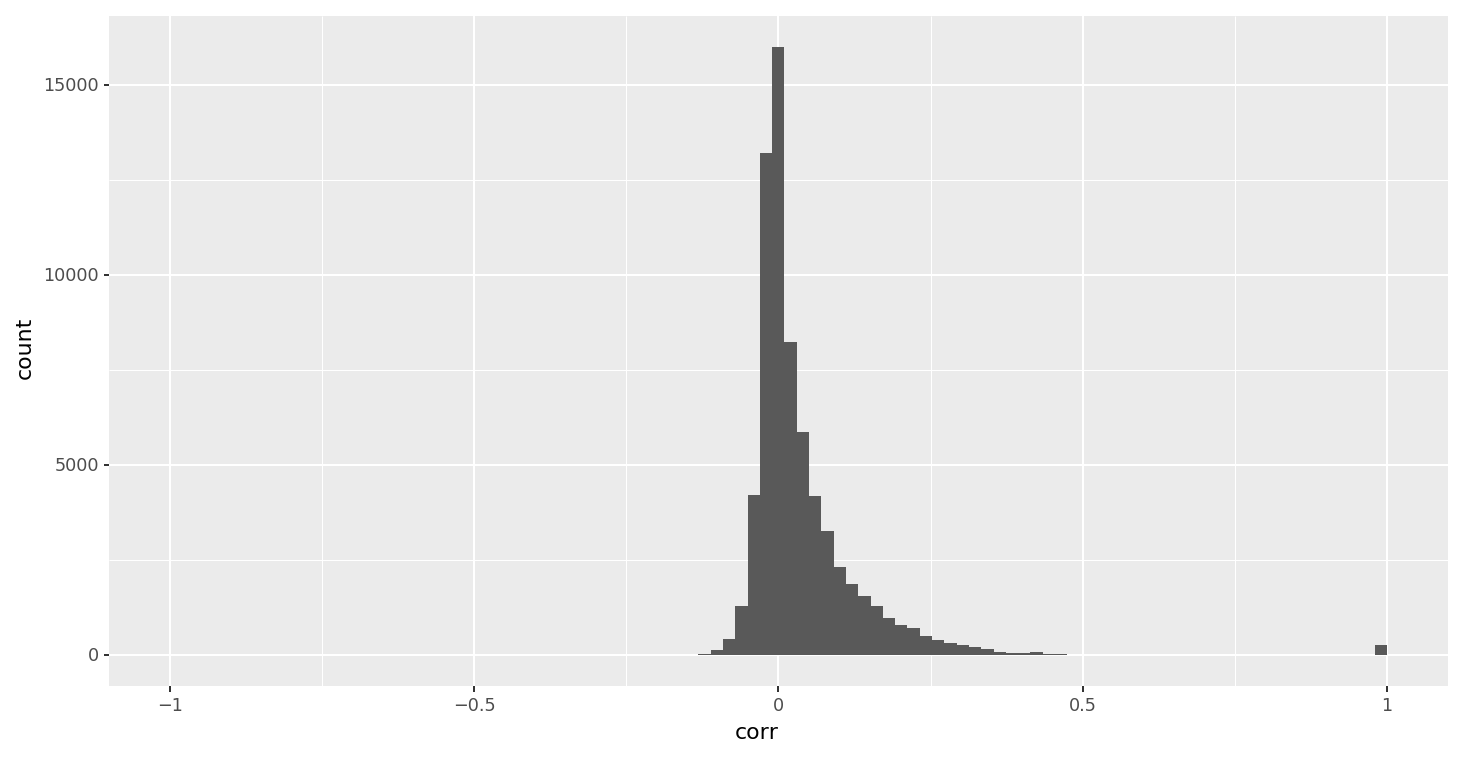

<ggplot: (417898844)>

In [ ]:
(pd.DataFrame(dict(corr=corr.values.ravel()))
    .pipe(ggplot)
    + aes(x='corr')
    + geom_histogram(bins=100)
    # + scale_y_log10()
    + expand_limits(x=[-1, 1])
    + theme_figsize(aspect=.5)
)

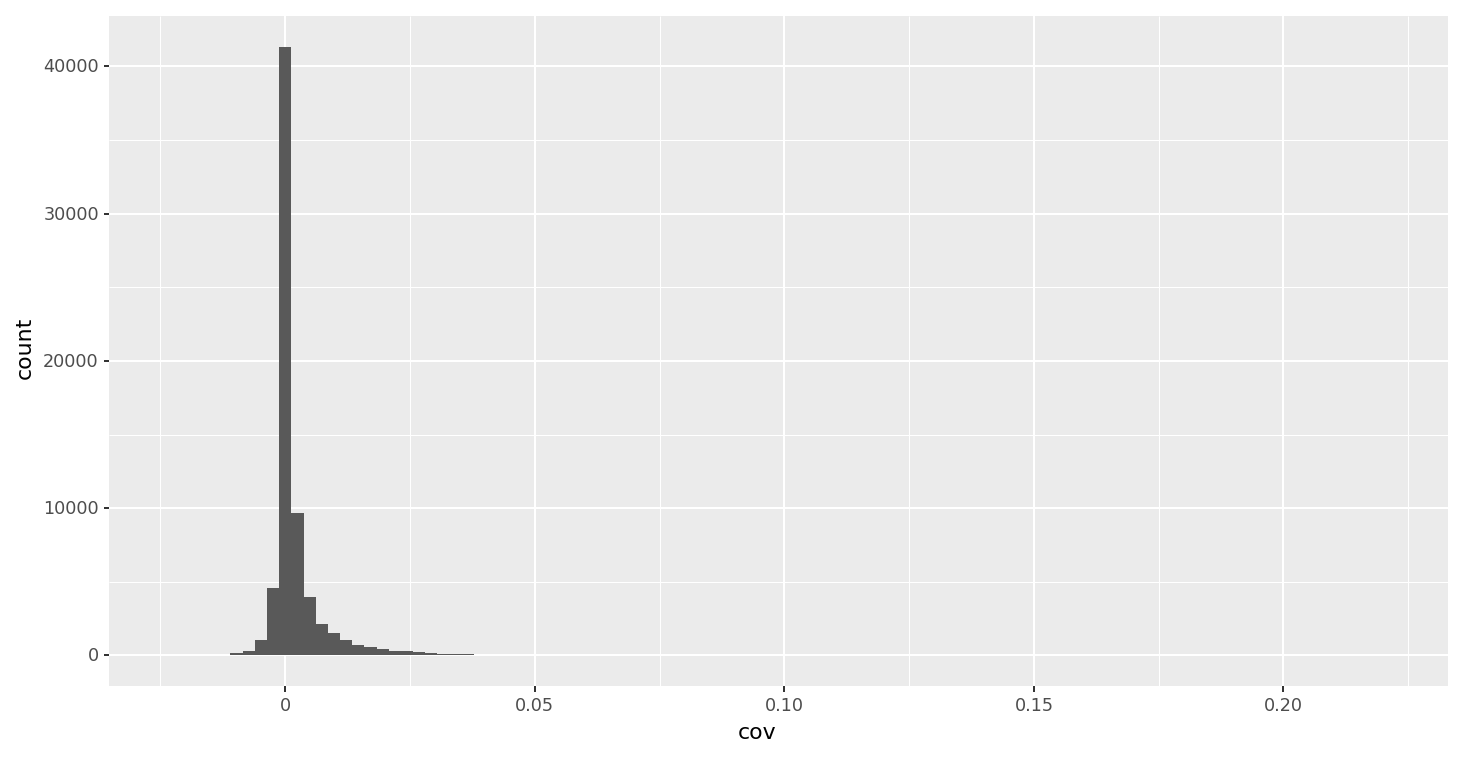

<ggplot: (-9223372036422858054)>

In [ ]:
(pd.DataFrame(dict(cov=cov.values.ravel()))
    .pipe(ggplot)
    + aes(x='cov')
    + geom_histogram(bins=100)
    # + scale_y_log10()
    # + expand_limits(x=[-1, 1])
    + theme_figsize(aspect=.5)
)

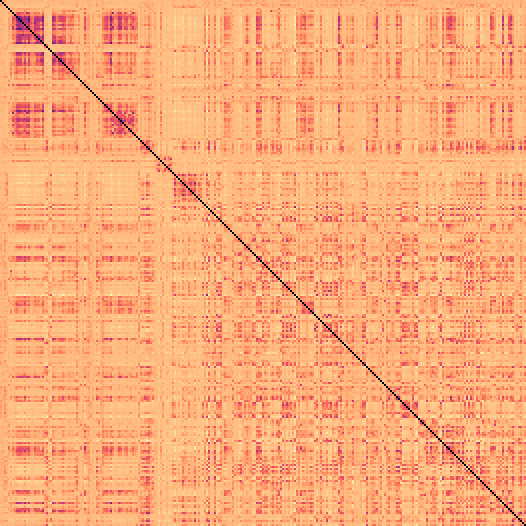

In [ ]:
# Corr matrix, ordered by taxo
#   - NOTE Invalid com_name's appear at the left/top (e.g. hybrid, slash, "domestic type")
show_img(scale=2, X=corr
    .pipe(df_transform_index, lambda s: as_ordered_cat(s, sort_like_com_name(s))).sort_index().T
    .pipe(df_transform_index, lambda s: as_ordered_cat(s, sort_like_com_name(s))).sort_index().T
    .values
)

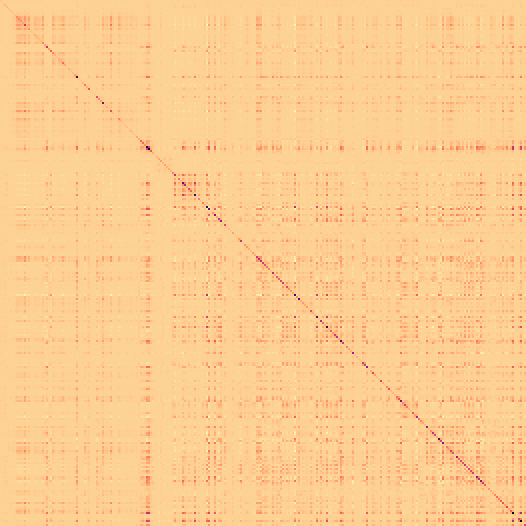

In [ ]:
# Cov matrix, ordered by taxo
#   - NOTE Invalid com_name's appear at the left/top (e.g. hybrid, slash, "domestic type")
show_img(scale=2, X=cov
    .pipe(df_transform_index, lambda s: as_ordered_cat(s, sort_like_com_name(s))).sort_index().T
    .pipe(df_transform_index, lambda s: as_ordered_cat(s, sort_like_com_name(s))).sort_index().T
    .values
)

(263, 263)

(34453,)

(262, 4)

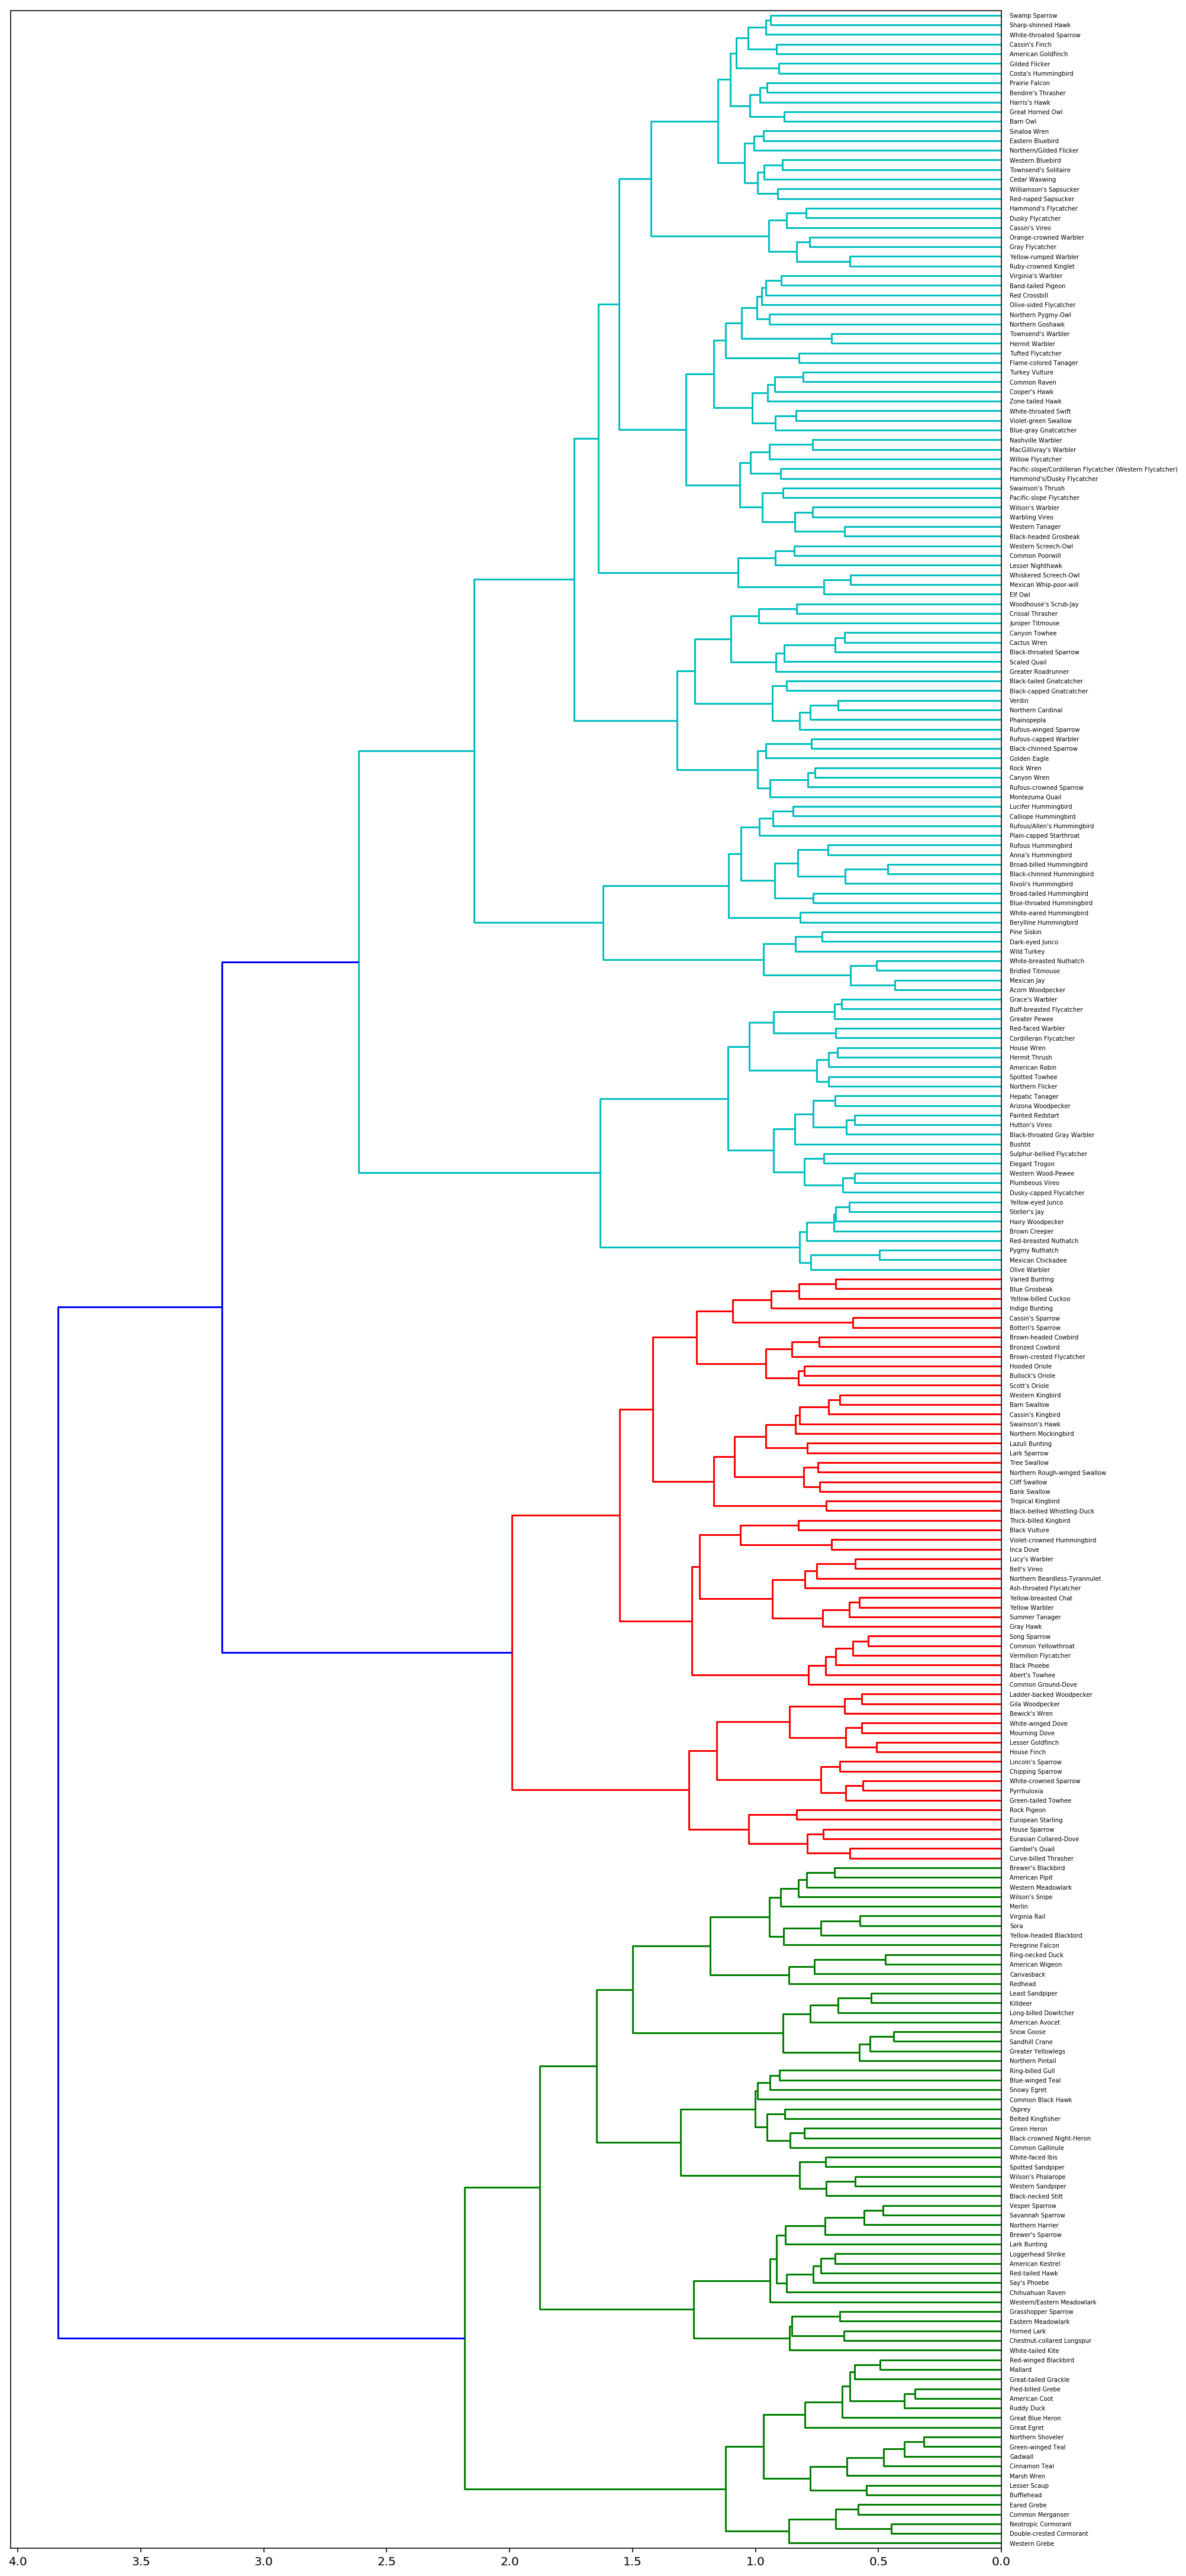

In [ ]:
# time[9s]
# Build dendrogram for agglom clustering
#   - Use scipy i/o sklearn so we can use 'ward'
#   - Mimic https://stackoverflow.com/a/34179197/397334
#       - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.squareform.html
#       - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html
#   - TODO Grok
X = (corr.values
    # .T[:10].T[:10]  # XXX Dev
    # .T[:50].T[:50]  # XXX Dev
    # .T[:100].T[:100]  # XXX Dev
)
display(X.shape)
from scipy.cluster import hierarchy as hc
y = hc.distance.squareform(1 - X)
display(y.shape)
Z = hc.linkage(y,
    method='ward',  # Looks great! [TODO Grok how it works]
    # method='weighted',
    # method='complete',
    # method='average',
)
display(Z.shape)
plt.figure(figsize=(15, 15*(len(X) / 100)))
dendrogram = hc.dendrogram(Z, labels=corr.columns,
    orientation='left',
)
dendrogram_label_order = dendrogram['ivl']
plt.show()

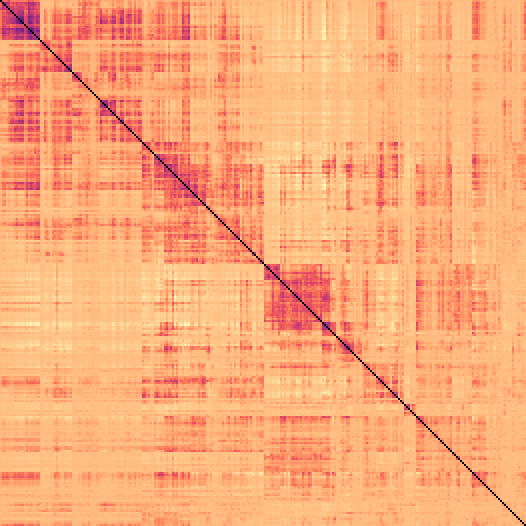

In [ ]:
# Corr matrix, ordered by dendrogram
show_img(scale=2, X=corr
    .pipe(df_transform_index, lambda s: as_ordered_cat(s, dendrogram_label_order)).sort_index().T
    .pipe(df_transform_index, lambda s: as_ordered_cat(s, dendrogram_label_order)).sort_index().T
    .values
)

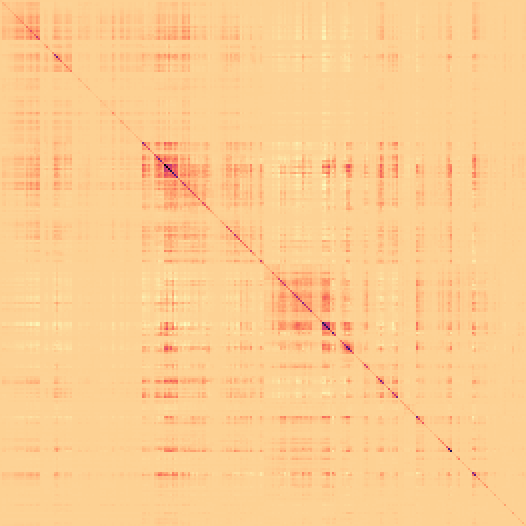

In [ ]:
# Cov matrix, ordered by dendrogram
show_img(scale=2, X=cov
    .pipe(df_transform_index, lambda s: as_ordered_cat(s, dendrogram_label_order)).sort_index().T
    .pipe(df_transform_index, lambda s: as_ordered_cat(s, dendrogram_label_order)).sort_index().T
    .values
)

In [ ]:
# Cluster species by dendrogram
hc_cluster = (
    S(hc.fcluster(Z,
        criterion='maxclust', t=12,  # Prety good -- NOTE Hand tuned
        # criterion='distance', t=1.7,  # Pretty good -- NOTE Hand tuned
        # criterion='inconsistent', t=1.1,  # Not great
    ))
    .pipe(df_display, lambda s: (s.shape,))
    .pipe(df_display, lambda s: s.value_counts()
        .pipe(df_display, lambda s: (s.shape,))
    )
    # .pipe(df_display, lambda s: s[:10])
)
clusters = (corr
    .reset_index()['common_name'].to_frame()
    .assign(common_name=lambda df: df.common_name.pipe(lambda s: as_ordered_cat(s, sort_like_com_name(s))))
    .pipe(df_assign_first, hc_cluster=hc_cluster)
    .sort_values(['hc_cluster', 'common_name'])
    .reset_index(drop=True)  # Drop meaningless ix (from alpha-sorted common_name)
    .pipe(df_display, lambda df: df
        # Show clusters as human-readable table
        .groupby('hc_cluster').apply(lambda df: df.reset_index(drop=True).reset_index())
        .pivot_table(index='index', columns='hc_cluster', values='common_name', aggfunc=np.max, fill_value='')
        .rename_axis(None)
    )
    .pipe(df_display, lambda df: (df.shape,))
    .pipe(df_display, lambda df: df.sample(10, random_state=0).sort_values('hc_cluster'))
)

(263,)

(12,)

12    55
6     43
10    21
8     21
4     21
9     20
1     20
5     18
2     16
3     14
7      8
11     6
dtype: int64

hc_cluster,1,2,3,4,5,6,7,8,9,10,11,12
0,Cinnamon Teal,Western/Eastern Meadowlark,Blue-winged Teal,Snow Goose,Gambel's Quail,Black-bellied Whistling-Duck,Hairy Woodpecker,Elegant Trogon,Rufous/Allen's Hummingbird,Scaled Quail,Western Screech-Owl,Hammond's/Dusky Flycatcher
1,Northern Shoveler,White-tailed Kite,Snowy Egret,American Wigeon,Rock Pigeon,Black Vulture,Steller's Jay,Arizona Woodpecker,Wild Turkey,Montezuma Quail,Whiskered Screech-Owl,Northern/Gilded Flicker
2,Gadwall,Northern Harrier,Green Heron,Northern Pintail,Eurasian Collared-Dove,Gray Hawk,Mexican Chickadee,Northern Flicker,Rivoli's Hummingbird,Golden Eagle,Elf Owl,Pacific-slope/Cordilleran Flycatcher (Western Flycatcher)
3,Mallard,Red-tailed Hawk,Black-crowned Night-Heron,Canvasback,White-winged Dove,Swainson's Hawk,Red-breasted Nuthatch,Greater Pewee,Plain-capped Starthroat,Greater Roadrunner,Lesser Nighthawk,Turkey Vulture
4,Green-winged Teal,American Kestrel,White-faced Ibis,Redhead,Mourning Dove,Inca Dove,Pygmy Nuthatch,Western Wood-Pewee,Blue-throated Hummingbird,Woodhouse's Scrub-Jay,Common Poorwill,Sharp-shinned Hawk
5,Lesser Scaup,Say's Phoebe,Osprey,Ring-necked Duck,Gila Woodpecker,Common Ground-Dove,Brown Creeper,Cordilleran Flycatcher,Lucifer Hummingbird,Juniper Titmouse,Mexican Whip-poor-will,Cooper's Hawk
6,Bufflehead,Loggerhead Shrike,Common Black Hawk,Virginia Rail,Ladder-backed Woodpecker,Yellow-billed Cuckoo,Olive Warbler,Buff-breasted Flycatcher,Black-chinned Hummingbird,Verdin,,Northern Goshawk
7,Common Merganser,Chihuahuan Raven,Common Gallinule,Sora,Bewick's Wren,Violet-crowned Hummingbird,Yellow-eyed Junco,Dusky-capped Flycatcher,Anna's Hummingbird,Rock Wren,,Harris's Hawk
8,Ruddy Duck,Horned Lark,Black-necked Stilt,Sandhill Crane,Curve-billed Thrasher,Northern Beardless-Tyrannulet,,Sulphur-bellied Flycatcher,Broad-tailed Hummingbird,Canyon Wren,,Zone-tailed Hawk
9,Pied-billed Grebe,Chestnut-collared Longspur,Western Sandpiper,American Avocet,European Starling,Black Phoebe,,Hutton's Vireo,Rufous Hummingbird,Cactus Wren,,Band-tailed Pigeon


(263, 2)

,hc_cluster,common_name
8,1,Ruddy Duck
55,4,Ring-necked Duck
129,6,Scott's Oriole
126,6,Varied Bunting
150,8,Plumbeous Vireo
155,8,Grace's Warbler
168,9,Anna's Hummingbird
200,10,Rufous-crowned Sparrow
239,12,Blue-gray Gnatcatcher
253,12,Hermit Warbler


# XXX Appendices

## Try AgglomerativeClustering

0    59
5    50
2    49
3    43
1    18
8    16
6     9
7     8
4     8
9     3
dtype: int64

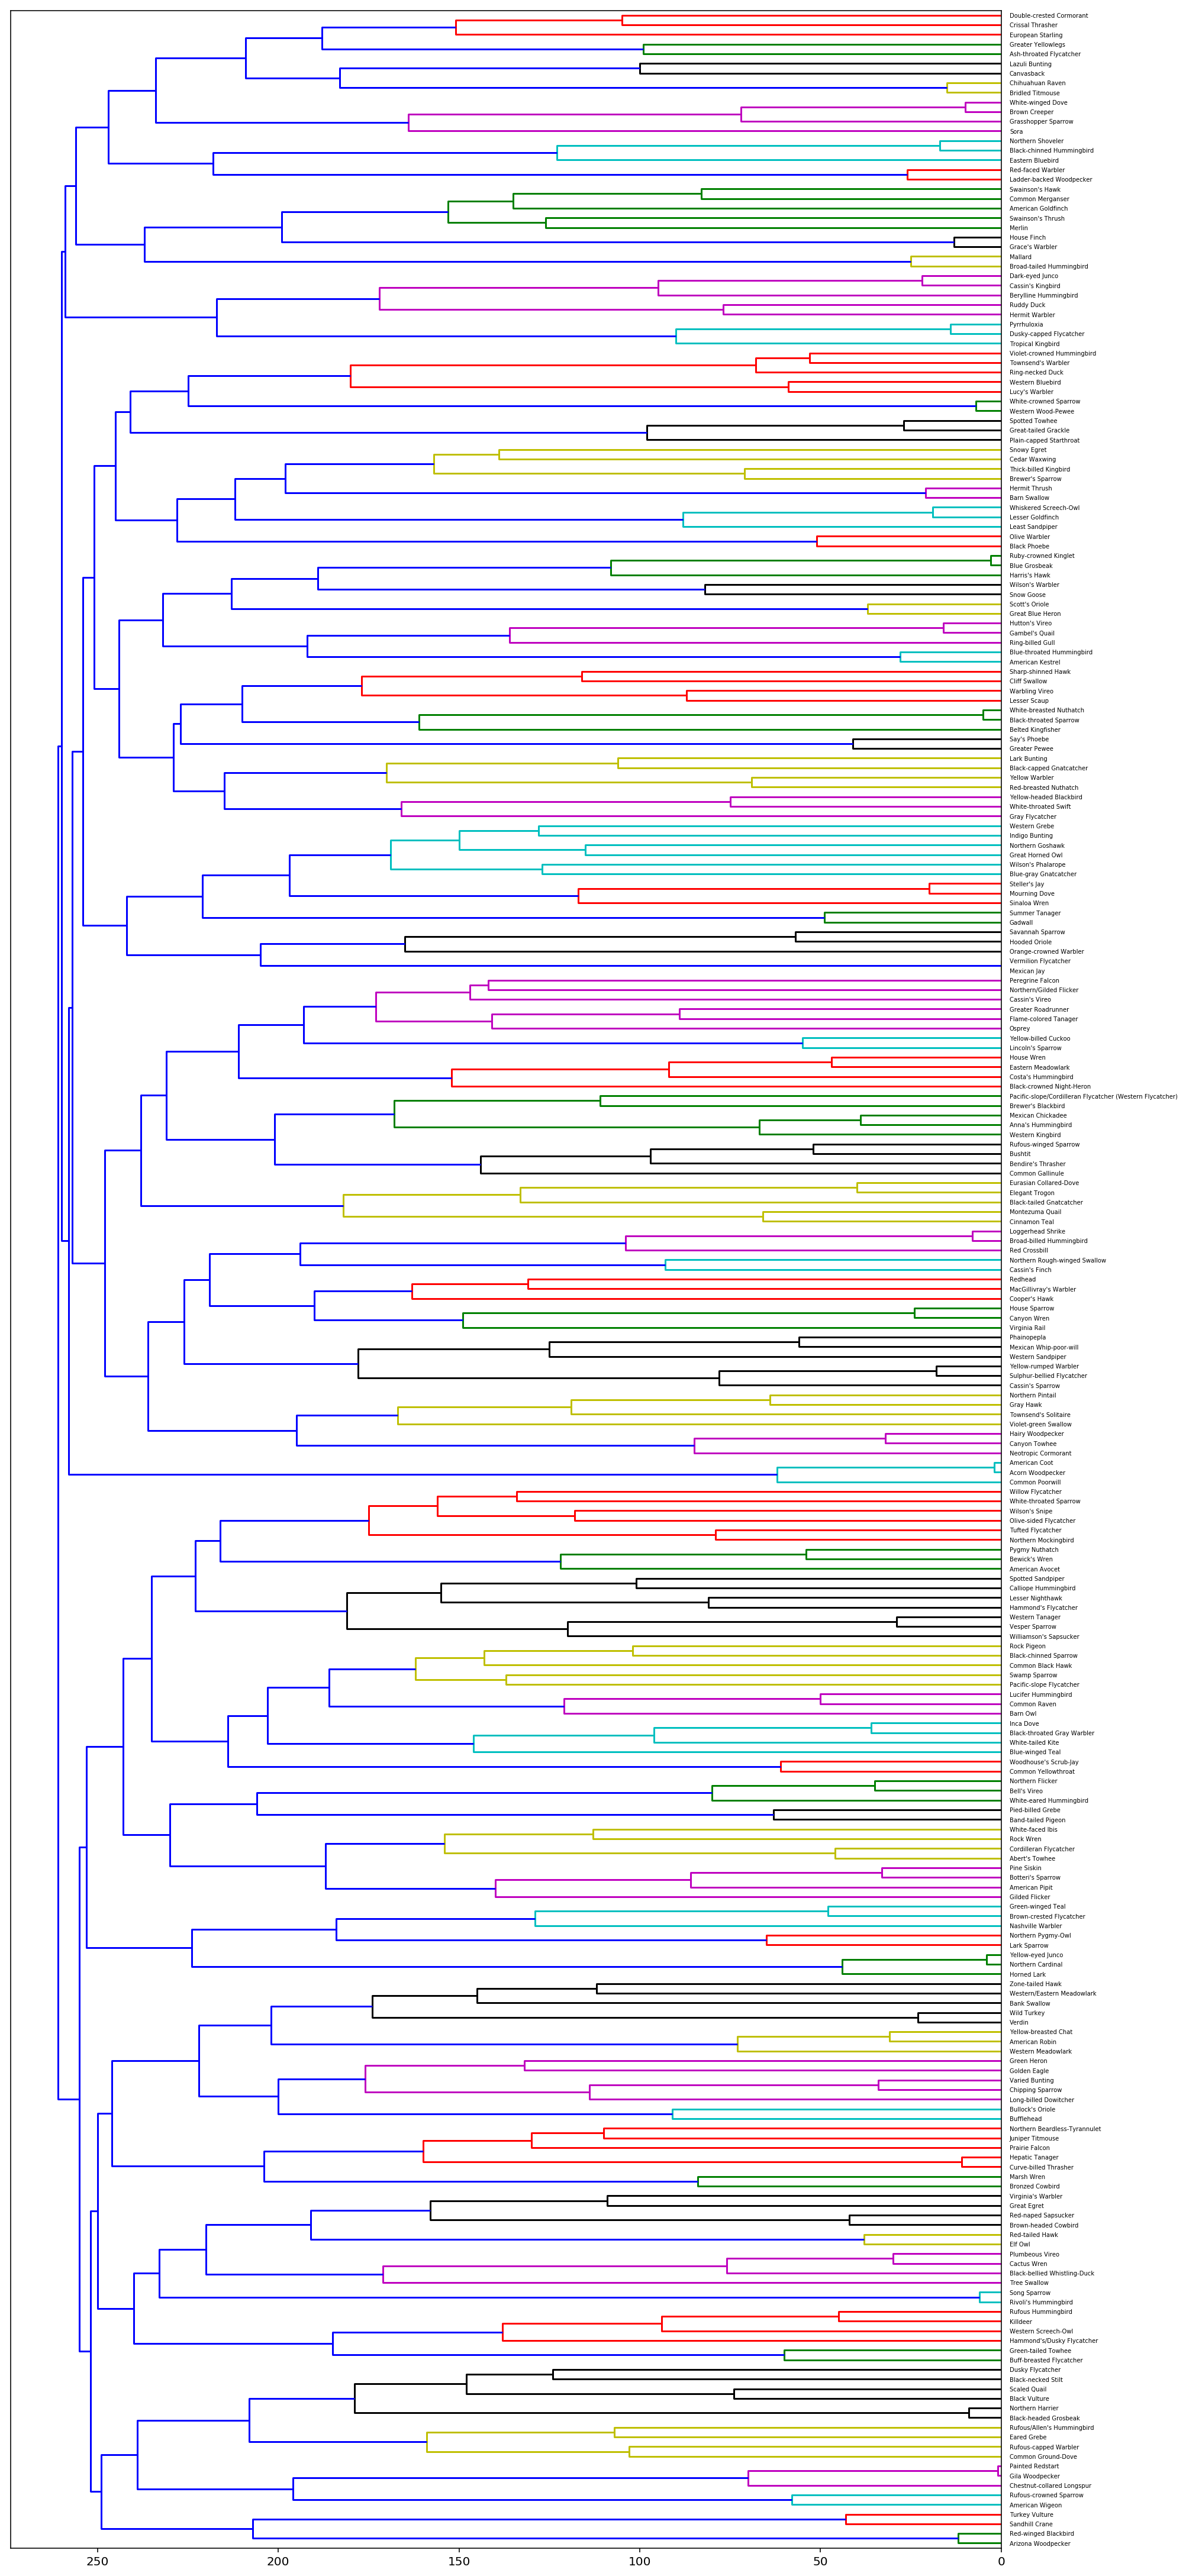

In [ ]:
# XXX
agglom = sk.cluster.AgglomerativeClustering(
    # affinity='precomputed', linkage='average',  # Not so great
    affinity='precomputed', linkage='complete',  # Decent, but less good than 'ward' above
    # affinity='precomputed', linkage='single',  # XXX In future version of sklearn
    # affinity='euclidean', linkage='ward',  # XXX Incorrect
    n_clusters=10,
).fit(corr.values)
display(S(agglom.labels_).value_counts())

def sk_agglom_dendrogram(agglom, **kwargs):
    from scipy.cluster import hierarchy as hc
    children = agglom.children_
    distance = np.arange(children.shape[0])  # Uniform distance between leaves in plot
    n_obs_per_level = np.arange(2, children.shape[0] + 2)
    linkage = np.column_stack([children, distance, n_obs_per_level]).astype(float)
    return hc.dendrogram(linkage, **kwargs)

plt.figure(figsize=(15, 15*(len(corr) / 100)))
_ = sk_agglom_dendrogram(agglom,
    labels=corr.columns,
    orientation='left',
)

## Try dbscan

In [ ]:
display(corr.shape)
X = corr.values
dbscan = sk.cluster.DBSCAN(

    # eps=0.50,  min_samples=5,   # 0/584/584
    # eps=1.00,  min_samples=5,   # 1/575/584
    # eps=1.25,  min_samples=5,   # 7/467/584
    # eps=1.375, min_samples=5,   # 6/316/584
    # eps=1.40,  min_samples=5,   # 10/183/584  <--
    # eps=1.425, min_samples=5,   # 1/15/584
    # eps=1.50,  min_samples=5,   # 1/2/584
    # eps=2.00,  min_samples=5,   # 1/0/584

    # eps=1.25,  min_samples=5,   # 7/467/584
    # eps=1.25,  min_samples=4,   # 11/436/584
    # eps=1.25,  min_samples=3,   # 15/404/584 <--
    # eps=1.25,  min_samples=2,   # 40/354/584
    # eps=1.25,  min_samples=1,   # 394/0/584

    # eps=1.50,  min_samples=50,  # 1/181/584

).fit(X)
display(
    'clusters/noise/total = %s/%s/%s' % (
        pd.Series(dbscan.labels_)[lambda s: s != -1].nunique(),
        (dbscan.labels_ == -1).sum(),
        len(X),
    ),
    'core_sample_indices_:',
    dbscan.core_sample_indices_,
    # 'components_: %s' % (dbscan.components_.shape,),  # Redundant: X[core_sample_indices_]
    'labels:',
    dbscan.labels_,
)

(263, 263)

'clusters/noise/total = 0/263/263'

'core_sample_indices_:'

array([], dtype=int64)

'labels:'

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

In [ ]:
(corr
    .columns.to_frame('common_name').reset_index(drop=True)
    .assign(label=dbscan.labels_)
    .sort_values(['label', 'common_name'], ascending=False)
    # [:10]
)

,common_name,label
262,Zone-tailed Hawk,-1
261,Yellow-rumped Warbler,-1
260,Yellow-headed Blackbird,-1
259,Yellow-eyed Junco,-1
258,Yellow-breasted Chat,-1
257,Yellow-billed Cuckoo,-1
256,Yellow Warbler,-1
255,Woodhouse's Scrub-Jay,-1
254,Wilson's Warbler,-1
253,Wilson's Snipe,-1
